In [22]:
# coding: utf-8
import lightgbm as lgb
import pandas as pd
import numpy as np
import warnings
import graphviz

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib for plot_example.py.')


In [2]:
np.random.seed(1)
x=np.random.uniform(low=-1, high=1, size=(400,2))
y=np.ones(len(x))

In [3]:
y[x[:,0]*x[:,1]<0]=0

In [4]:
X_train=x[:200,:]
y_train=y[:200]
X_test=x[200:,]
y_test=y[200:]

Text(0, 0.5, '$x_2$')

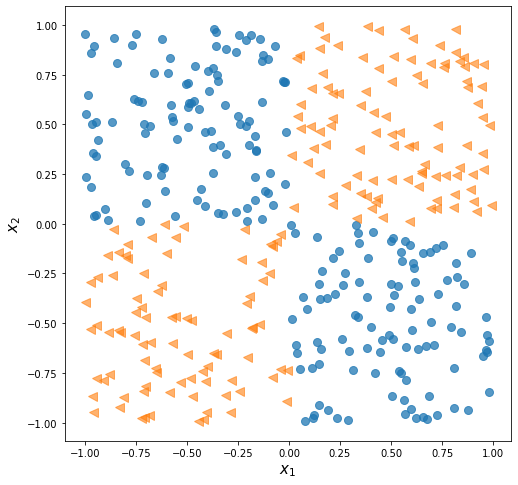

In [5]:
fig=plt.figure(figsize=(8,8))
plt.plot(x[y==0,0],
        x[y==0,1], 'o', alpha=0.75, markersize=8)
plt.plot(x[y==1,0],
        x[y==1,1], '<', alpha=0.60, markersize=9)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$x_2$',size=15)

In [10]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)
warnings.filterwarnings('ignore')



Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[10]	training's l1: 0.211862	training's l2: 0.0537596	valid_1's l1: 0.241912	valid_1's l2: 0.0796967
[20]	training's l1: 0.0955257	training's l2: 0.0154748	valid_1's l1: 0.128293	valid_1's l2: 0.0339861
[30]	training's l1: 0.0585519	training's l2: 0.00888021	valid_1's l1: 0.0920653	valid_1's l2: 0.0238963
[40]	training's l1: 0.047741	training's l2: 0.00694394	valid_1's l1: 0.0812935	valid_1's l2: 0.0205404
[50]	training's l1: 0.0434774	training's l2: 0.00572248	valid_1's l1: 0.0769982	valid_1's l2: 0.0183284
[60]	training's l1: 0.0396555	training's l2: 0.0048357	valid_1's l1: 0.0739195	valid_1's l2: 0.0172764
[70]	training's l1: 0.0374488	training's l2: 0.00415498	valid_1's l1: 0.0716787	valid_1's l2: 0.0161245
[80]	training's l1: 0.0351956	training's l2: 0.00361254	valid_1's l1: 0.0690903	valid_1's l2:

In [18]:
y_train

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

Plotting metrics recorded during training...


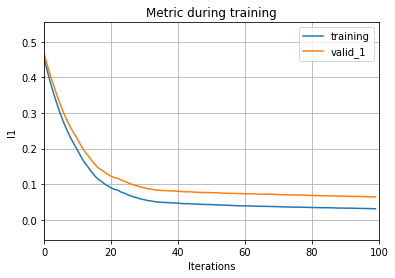

Plotting feature importances...


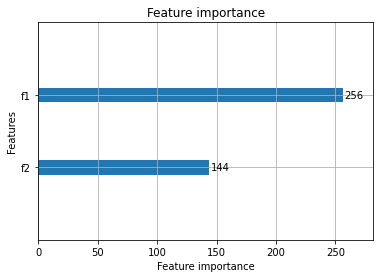

Plotting 54th tree...


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

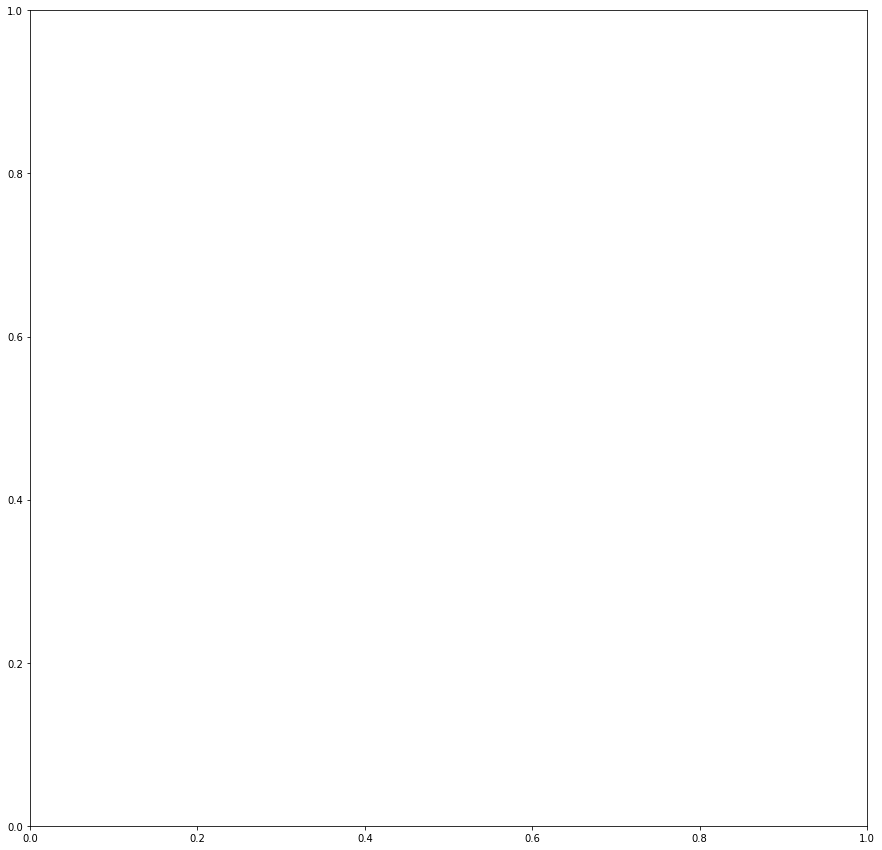

In [25]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=2)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='y_train', bins='auto')
# plt.show()

print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)